In [1]:
import numpy 
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import colorama 
from colorama import Fore

In [2]:
def calc_sexo ():
    dados = pd.read_excel('Basededadostrabalhofinal.xlsx', sheet_name= 2)       #Retira os dados da aba 2 da planilha 
    qnt_h = dados['MCUL03'].str.contains('Masculino').sum()                     #Verifica se contem Masculino na Coluna MCUL03 e soma
    qnt_m = dados['MCUL03'].str.contains('Feminino').sum()
    total = qnt_h + qnt_m                                                       #Soma a quantidade de homens e mulheres
    if  qnt_h > qnt_m:                                                          #Condição para encontrar a moda
        moda = "Homens"
    else:
        moda = "Mulheres"
    fig = plt.figure(figsize = (3, 5))
    plt.bar('Homens',qnt_h, color = 'blue', width = 0.4, edgecolor = 'black')
    plt.bar('Mulheres',qnt_m, color = 'red', width = 0.4, edgecolor = 'black')
    plt.xlabel("Sexo", fontweight = 'bold', fontsize = '15')
    plt.ylabel("Quantidade", fontweight = 'bold', fontsize = '15')
    #plt.show()
    print(Fore.MAGENTA + "***********************************SEXO*******************************************\n")
    print(Fore.GREEN + "Numero de candidatos: {c}".format(c = total))
    print("A quantidade de Homens presentes na pesquisa foi de: {h}".format(h = qnt_h))
    print("A quantidade de Mulheres presentes na pesquisa foi de: {m}".format(m = qnt_m))
    print("O sexo que mais se repete (MODA): {n}".format(n = moda))
    print(Fore.MAGENTA + "--------------------------------------------------------------------------------\n")
    
def calc_idade():
    dados = pd.read_excel('Basededadostrabalhofinal.xlsx', sheet_name= 2) 
    s_idade = dados['MCUL04'].str.contains('()').sum()
    p_s_idade = (s_idade*100)/5330
    
    
    dados['MCUL04'] = pd.to_numeric(dados['MCUL04'], errors= 'coerce')
    dados['MCUL04'] = dados['MCUL04'].fillna(0)
    moda = int (st.mode(dados['MCUL04']))
    mediana = int (st.median_high(dados['MCUL04']))
    m_idades = (st.mean(dados['MCUL04']))
    
    print(Fore.MAGENTA + "***********************************IDADE******************************************\n")
    print(Fore.GREEN + f"A quantidade de pessoas sem informar a idade foi de :{s_idade}, aproximadamente {p_s_idade:.2f}% das pessoas")
    print("A media das idades é de: {0:.2f}".format(m_idades))
    dados = dados.sort_values('MCUL04')
    dados.to_excel('Tste.xlsx')
    
    print("A moda foi de: {m}\n".format(m = moda))
    print("A mediana em relação as idadades foi de :{i}".format(i = mediana))
    
    qt = numpy.quantile(dados['MCUL04'],[0.25, 0.5, 0.75])
    print("\nOs quartils de 25%, 50 e de 75%, respectivamente foram de:       {q}".format(q = qt))
    
    dc = st.quantiles(dados['MCUL04'] , n=10)
    print("Os decis calculados de 10 a 90%, foram de :      {dc}\n".format(dc = dc))
    print("A amplitude dos dados foi de :       {a}".format(a= dados['MCUL04'].max() - 19.00))
    print("A variancia foi de :     {0:.2f}".format(st.variance(dados['MCUL04'])))
    print("E o desvio padrao encontrado foi : {0:.2f}".format(st.stdev(dados['MCUL04'])))
    print(Fore.MAGENTA + "---------------------------------------------------------------------------------\n")

In [3]:
def calc_raca ():
    print(Fore.MAGENTA + "***********************************RAÇA*******************************************\n")
    
    dados = pd.read_excel('Basededadostrabalhofinal.xlsx', sheet_name= 2)
    qnt_h = dados['MCUL03'].str.contains('Masculino').sum()
    qnt_m = dados['MCUL03'].str.contains('Feminino').sum()
    total = qnt_h + qnt_m
    qnt_h_pt = (dados['MCUL03'].str.contains('Masculino') & dados['MCUL05'].str.contains('Preta')).sum()
    qnt_m_pt = (dados['MCUL03'].str.contains('Feminino') & dados['MCUL05'].str.contains('Preta')).sum()
    
    qnt_h_prd = (dados['MCUL03'].str.contains('Masculino') & dados['MCUL05'].str.contains('Parda')).sum()
    qnt_m_prd = (dados['MCUL03'].str.contains('Feminino') & dados['MCUL05'].str.contains('Parda')).sum()
    qnt_h_brc = (dados['MCUL03'].str.contains('Masculino') & dados['MCUL05'].str.contains('Branca')).sum()
    qnt_m_brc = (dados['MCUL03'].str.contains('Feminino') & dados['MCUL05'].str.contains('Branca')).sum()
    qnt_h_ind = (dados['MCUL03'].str.contains('Masculino') & dados['MCUL05'].str.contains('Indígena')).sum()
    qnt_m_ind = (dados['MCUL03'].str.contains('Feminino') & dados['MCUL05'].str.contains('Indígena')).sum()
    qnt_h_amr = (dados['MCUL03'].str.contains('Masculino') & dados['MCUL05'].str.contains('Amarela')).sum()
    qnt_m_amr = (dados['MCUL03'].str.contains('Feminino') & dados['MCUL05'].str.contains('Amarela')).sum()
    p_h_pt = (qnt_h_pt*100)/qnt_h
    p_h_prd = (qnt_h_prd*100)/qnt_h
    p_h_brc = (qnt_h_brc*100)/qnt_h
    p_h_ind = (qnt_h_ind*100)/qnt_h
    p_h_amr = (qnt_h_amr*100)/qnt_h
    p_m_pt = (qnt_m_pt*100)/qnt_m
    p_m_prd = (qnt_m_prd*100)/qnt_m
    p_m_brc = (qnt_m_brc*100)/qnt_m
    p_m_ind = (qnt_m_ind*100)/qnt_m
    p_m_amr = (qnt_m_amr*100)/qnt_m
    
    pt = dados['MCUL05'].str.contains('Preta').sum()
    prd = dados['MCUL05'].str.contains('Parda').sum()
    brc = dados['MCUL05'].str.contains('Branca').sum()
    ind = dados['MCUL05'].str.contains('Indígena').sum()
    amr = dados['MCUL05'].str.contains('Amarela').sum()
    pt_total = (pt*100)/total
    prd_total = (prd*100)/total
    brc_total = (brc*100)/total
    ind_total = (ind*100)/total
    amr_total = (amr*100)/total
    print(Fore.BLUE +"------------------------------------GERAL-----------------------------------------\n")
    print(Fore.GREEN +f"PRETOS: {pt}, {pt_total:.2f}% da população")
    print(f"PARDOS: {prd}, {prd_total:.2f}% da população")
    print(f"BRANCOS: {brc}, {brc_total:.2f}% da população")
    print(f"INDÍGENAS: {ind}, {ind_total:.2f}% da população")
    print(f"AMARELOS: {amr}, {amr_total:.2f}% da população")
    print(f"A moda entre as classes em geral é: BRANCOS, com {brc} repetições\n")   
    
    print(Fore.BLUE +"-----------------------------------HOMENS-----------------------------------------\n")
    print(Fore.GREEN +f"PRETOS: {qnt_h_pt}, aproximadamente {p_h_pt:.2f}%" + " dos homens")
    print(f"PARDOS: {qnt_h_prd}, aproximadamente {p_h_prd:.2f}%" + " dos homens")
    print(f"BRANCOS: {qnt_h_brc}, aproximadamente {p_h_brc:.2f}%" + " dos homens")
    print(f"INDÍGENAS: {qnt_h_ind}, aproximadamente {p_h_ind:.2f}%" + " dos homens")
    print(f"AMARELOS: {qnt_h_amr}, aproximadamente {p_h_amr:.2f}%" + " dos homens")
    print(f"A moda entre os homens é: BRANCOS, com {qnt_h_brc} repetições\n")
    
    print(Fore.BLUE + "---------------------------------MULHERES-----------------------------------------\n")
    print(Fore.GREEN +f"PRETOS: {qnt_m_pt}, aproximadamente {p_m_pt:.2f}%" + " dos homens")
    print(f"PARDOS: {qnt_m_prd}, aproximadamente {p_m_prd:.2f}%" + " das mulheres")
    print(f"BRANCOS: {qnt_m_brc}, aproximadamente {p_m_brc:.2f}%" + " das mulheres")
    print(f"INDÍGENAS: {qnt_m_ind}, aproximadamente {p_m_ind:.2f}%" + " das mulheres")
    print(f"AMARELOS: {qnt_m_amr}, aproximadamente {p_m_amr:.2f}%" + " das mulheres")
    print(f"A moda entre os mulheres é: BRANCOS, com {qnt_m_brc} repetições\n")
    print(Fore.MAGENTA + "---------------------------------------------------------------------------------\n")

In [4]:
def calc_escolaridade():
    print(Fore.MAGENTA + "***********************************ESCOLARIDADE*******************************************\n")
    dados = pd.read_excel('Basededadostrabalhofinal.xlsx', sheet_name= 2)
    qnt_h = dados['MCUL03'].str.contains('Masculino').sum()
    qnt_m = dados['MCUL03'].str.contains('Feminino').sum()
    qnt_graduado = dados['MCUL06'].str.contains('Ensino superior completo').sum()
    qnt_graduado_in = dados['MCUL06'].str.contains('Ensino superior incompleto').sum()
    qnt_especialista = dados['MCUL06'].str.contains('Especialização').sum()
    qnt_mestre = dados['MCUL06'].str.contains('Mestrado').sum()
    qnt_doutor = dados['MCUL06'].str.contains('Doutorado').sum()
    qnt_medio_in = 96
    qnt_medio_com = 641
    qnt_fund_com = 43
    qnt_fund_in = 55
    print(Fore.GREEN +f"A QUANTIDADE DE PESSOAS GRADUADAS FOI DE {qnt_graduado}!!!")
    print(f"A QUANTIDADE DE MESTRES FOI DE {qnt_mestre}!!!")
    print(f"A QUANTIDADE DE ESPECIALISTAS FOI DE {qnt_especialista}!!!")
    print(f"A QUANTIDADE DE DOUTORES FOI DE {qnt_doutor}!!!")
    
    print(f"TOTAL:   {qnt_graduado + qnt_graduado_in + qnt_especialista + qnt_mestre + qnt_doutor + qnt_medio_com + qnt_medio_in + qnt_fund_com +qnt_fund_in}")
    qnt_m_graduado = (dados['MCUL03'].str.contains('Feminino') & dados['MCUL06'].str.contains('Ensino superior completo')).sum()
    qnt_h_graduado = (dados['MCUL03'].str.contains('Masculino') & dados['MCUL06'].str.contains('Ensino superior completo')).sum()
    p_m_graduado = (qnt_m_graduado*100)/qnt_m
    p_h_graduado = (qnt_h_graduado*100)/qnt_h
    print(f"\nNA PESQUISA TIVEMOS {qnt_m_graduado} MULHERES COM GRADUAÇÃO COMPLETA!!!! APROXIMADAMENTE {p_m_graduado:.2f} % DAS MULHERES!!!")
    print(f"NA PESQUISA TIVEMOS {qnt_h_graduado} HOMENS GRADUAÇÃO COMPLETA!!!! APROXIMADAMENTE {p_h_graduado:.2f} % DOS HOMENS!!! ")
    qnt_hp_graduado = ((dados['MCUL03'].str.contains('Masculino') & dados['MCUL05'].str.contains('Preta')) & dados['MCUL06'].str.contains('Ensino superior completo')).sum()
    qnt_mp_graduado = ((dados['MCUL03'].str.contains('Feminino') & dados['MCUL05'].str.contains('Preta')) & dados['MCUL06'].str.contains('Ensino superior completo')).sum()
    p_hp_graduado = (qnt_hp_graduado*100)/qnt_h
    p_mp_graduado = (qnt_mp_graduado*100)/qnt_m
    print(f"\nAPENAS {p_hp_graduado:.2f}% DOS HOMENS GRADUADOS SÃO PRETOS!")
    print(f"APENAS {p_mp_graduado:.2f}% DAS MULHERES GRADUADAS SÃO NEGRAS!")
    qnt_hb_graduado = ((dados['MCUL03'].str.contains('Masculino') & dados['MCUL05'].str.contains('Branca')) & dados['MCUL06'].str.contains('Ensino superior completo')).sum()
    qnt_mb_graduado = ((dados['MCUL03'].str.contains('Feminino') & dados['MCUL05'].str.contains('Branca')) & dados['MCUL06'].str.contains('Ensino superior completo')).sum()
    p_hb_graduado = (qnt_hb_graduado*100)/qnt_h
    p_mb_graduado = (qnt_mb_graduado*100)/qnt_m
    print(f"\n{p_hb_graduado:.2f}% DOS HOMENS BRANCOS POSSUEM GRADUAÇÃO!")
    print(f"{p_mb_graduado:.2f}% DAS MULHERES BRANCAS POSSUEM GRADUAÇÃO!")
    fig = plt.figure(figsize = (3, 5))
    plt.bar('GRADUADO',qnt_graduado, color = 'blue', width = 0.4, edgecolor = 'black')
    plt.bar('ESPECIALISTA',qnt_especialista, color = 'red', width = 0.4, edgecolor = 'black')
    plt.bar('MESTRE',qnt_mestre, color = 'yellow', width = 0.4, edgecolor = 'black')
    plt.bar('DOUTOR',qnt_doutor, color = 'green', width = 0.4, edgecolor = 'black')
    plt.xlabel("Escolaridade", fontweight = 'bold', fontsize = '15')
    plt.ylabel("Quantidade", fontweight = 'bold', fontsize = '15')
    #plt.show()

In [5]:
def anova():
    print(Fore.MAGENTA + "***********************************TESTE ANOVA*******************************************\n")
    graduado = [10,17,16,15]
    especialista = [11,12,34,23]
    mestre = [22,21,25,27]
    doutor = [32,31,17,19]
    
    print(Fore.WHITE +f"Os valores obtidos no anova de F e pvalue foram respectivamente:\n")
    anova = f_oneway(graduado,especialista,mestre,doutor)
    print(anova)
    print("\n\n")

In [6]:
   
    
def main():
    print(Fore.YELLOW + "----------------------------DADOS DA PESQUISA------------------------------\n\n")
    calc_sexo()
    calc_idade()
    calc_raca()
    calc_escolaridade()
    anova()

----------------------------DADOS DA PESQUISA------------------------------


***********************************SEXO*******************************************

Numero de candidatos: 5330
A quantidade de Homens presentes na pesquisa foi de: 2678
A quantidade de Mulheres presentes na pesquisa foi de: 2652
O sexo que mais se repete (MODA): Homens
--------------------------------------------------------------------------------



/home/vinicius/miniconda3/envs/copel-env/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


***********************************IDADE******************************************

A quantidade de pessoas sem informar a idade foi de :41, aproximadamente 0.77% das pessoas
A media das idades é de: 43.99
A moda foi de: 40

A mediana em relação as idadades foi de :43

Os quartils de 25%, 50 e de 75%, respectivamente foram de:       [36. 43. 52.]
Os decis calculados de 10 a 90%, foram de :      [31.0, 35.0, 38.0, 41.0, 43.0, 47.0, 50.0, 53.0, 58.0]

A amplitude dos dados foi de :       68.0
A variancia foi de :     123.60
E o desvio padrao encontrado foi : 11.12
---------------------------------------------------------------------------------

***********************************RAÇA*******************************************

------------------------------------GERAL-----------------------------------------

PRETOS: 335, 6.29% da população
PARDOS: 1798, 33.73% da população
BRANCOS: 3143, 58.97% da população
INDÍGENAS: 13, 0.24% da população
AMARELOS: 41, 0.77% da população
A moda entre

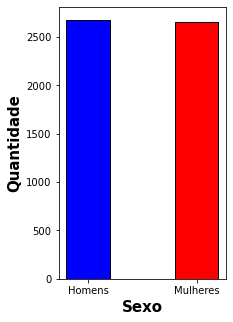

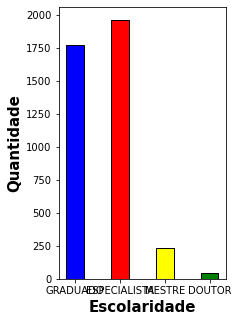

In [7]:
if __name__ == '__main__':
    main()